# Testing

---

In this notebook, we can test pre-created models for Banana environment

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import torch
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import DoubleDDQNAgent
import time
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

As in the training side, we will start the environment again.

In [2]:

env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])


epsilon = 0
scores = []
scores_window = deque(maxlen=100)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


For testing our agent we can use helper functions below

In [3]:
def getPreTrainedAgent():
    agent = DoubleDDQNAgent(state_size, action_size, seed = 0)
    # load the weights from file
    agent.qnetwork_local.load_state_dict(torch.load('banana.pth'))
    return agent

def updateScoreInfo(score, i_episode):
    scores.append(score)
    scores_window.append(score)
    if(i_episode % 100 == 0):
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

def getEnvStepResults(envInfo):
    nextState = envInfo.vector_observations[0]
    reward = envInfo.rewards[0]
    done = envInfo.local_done[0]
    return nextState, reward, done

def plotScoreInfo(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

Now, we can define testing episode functions by using helper functions

In [4]:
def testEpisode(agent):
    env_info = env.reset(train_mode=False)[brain_name]
    currentState = env_info.vector_observations[0]
    score = 0
    while(True):
        currentAction = agent.act(currentState, epsilon)
        env_info = env.step(currentAction)[brain_name]
        nextState, reward, done = getEnvStepResults(env_info)
        currentState = nextState
        score += reward
        if(done):
            #time.sleep(0) # more waiting between each episode to seperate them
            break
        #time.sleep(0.02) # waiting between each step to visual examination
    return score


def testEpisodes(agent, numberOfEpisodes):
    for i_episode in range(1, numberOfEpisodes + 1 ):
        scoreForEpisode = testEpisode(agent)
        updateScoreInfo(scoreForEpisode, i_episode)

Let's see our agent in action!!

Episode 100	Average Score: 15.46


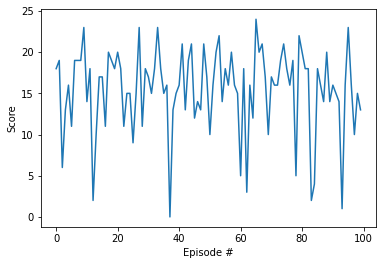

In [5]:
numberOfEpisodes = 100
agent = getPreTrainedAgent()
testEpisodes(agent, numberOfEpisodes)
plotScoreInfo(scores)

In [6]:
env.close()